#### Imports
see time_series_inital_EDA.ipynb for preprocessing of "unhcr_refugees_08-16.csv"

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
import powerlaw



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
df.head()

,year,destination,origin,type,value,iso-origin,iso-destination,share
0,2008,Afghanistan,Afghanistan,Internally displaced persons,230670,AFG,AFG,8.451298e-03
1,2008,Afghanistan,Afghanistan,Returned IDPs,6453,AFG,AFG,2.364253e-04
2,2008,Afghanistan,Eritrea,Asylum-seekers,1,ERI,AFG,2.362594e-07
3,2008,Afghanistan,Iran (Islamic Rep. of),Refugees (incl. refugee-like situations),30,IRN,AFG,4.118303e-07
4,2008,Afghanistan,Iran (Islamic Rep. of),Asylum-seekers,4,IRN,AFG,5.491070e-08


#### making a networkx graph

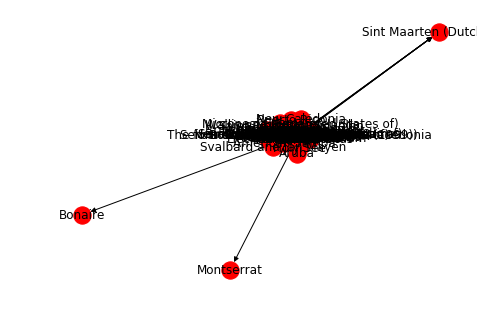

In [3]:
from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)
#print(from_to_values)


edge_list=from_to_values[['origin', 'destination', 'value']]
edges = list(map(tuple, list(edge_list.values)))
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)

#print(edges)
nx.draw(DG,with_labels=True)

plt.show()

#### making powerlaw graph for all time refugees per origin country

In [4]:
origin = df.groupby(["origin"])["value"].agg(['sum'])
origin = origin.sort_values(['sum'], ascending=False)

print(origin)

degree_values =  origin['sum'].tolist()   #  sorted(set(degrees.values()))
print(degree_values)

                                                sum
origin                                             
Syrian Arab Rep.                           61377758
Colombia                                   55109649
Afghanistan                                41693665
Iraq                                       37940068
Dem. Rep. of the Congo                     34040052
Sudan                                      27092112
Somalia                                    24109971
South Sudan                                14942060
Pakistan                                   14388528
Yemen                                      10134450
Nigeria                                     9866474
Myanmar                                     8218269
Central African Rep.                        7690690
Ukraine                                     7206676
Azerbaijan                                  6233370
Burundi                                     4397660
Côte d'Ivoire                               4115303
Uganda      

<Figure size 1296x576 with 0 Axes>

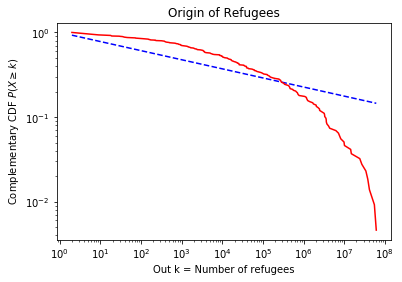

alpha=  1.1075203141462449   sigma=  0.0072989545221011825


In [5]:
plt.figure(figsize=(18,8));

#lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Origin of Refugees')
plt.xlabel('Out k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
#plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

#### narrowing down to recent years for comparison on refugees per origin country

In [6]:
df_17 = df[df['year']>=2017]

origin = df_17.groupby(["origin"])["value"].agg(['sum'])
origin = origin.sort_values(['sum'], ascending=False)

print(origin)

degree_values =  origin['sum'].tolist()   #  sorted(set(degrees.values()))
print(degree_values)

                                                sum
origin                                             
Syrian Arab Rep.                           13288389
Colombia                                    7901917
Dem. Rep. of the Congo                      5374584
Afghanistan                                 5336589
Iraq                                        4809864
South Sudan                                 4363219
Somalia                                     3203162
Sudan                                       3141728
Nigeria                                     2699575
Yemen                                       2187312
Ukraine                                     1977299
Myanmar                                     1551747
Central African Rep.                        1436330
Ethiopia                                    1303839
Burundi                                      791869
Philippines                                  719027
Pakistan                                     661859
Azerbaijan  

<Figure size 1296x576 with 0 Axes>

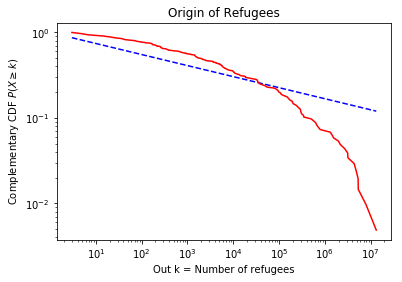

alpha=  1.1291883013509296   sigma=  0.009022902352249918


In [7]:
plt.figure(figsize=(18,8));

#lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Origin of Refugees')
plt.xlabel('Out k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
#plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

#### making powerlaw graphs for destination

In [8]:
destination = df.groupby(["destination"])["value"].agg(['sum'])
destination = destination.sort_values(['sum'], ascending=False)

print(destination)

degree_values =  destination['sum'].tolist()   #  sorted(set(degrees.values()))
print(degree_values)

                                                sum
destination                                        
Colombia                                   51320612
Syrian Arab Rep.                           41480764
Dem. Rep. of the Congo                     30710290
Pakistan                                   30189635
Iraq                                       28927602
Sudan                                      23963380
Somalia                                    14212275
Afghanistan                                13007722
Turkey                                     12603578
Yemen                                      12360020
South Sudan                                11013139
Iran (Islamic Rep. of)                      9773846
Nigeria                                     8705052
Uganda                                      8233450
Kenya                                       7342571
Germany                                     7186693
Ukraine                                     6107814
Azerbaijan  

<Figure size 1296x576 with 0 Axes>

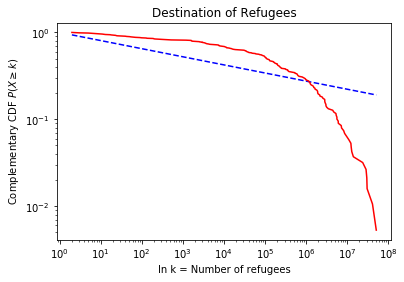

alpha=  1.0933669066316518   sigma=  0.006791443127673315


In [9]:
plt.figure(figsize=(18,8));

#lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Destination of Refugees')
plt.xlabel('In k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
#plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

#### narrowing down to see more recent years, refugees per destination country

In [10]:
destination = df_17.groupby(["destination"])["value"].agg(['sum'])
destination = destination.sort_values(['sum'], ascending=False)

print(destination)

degree_values =  destination['sum'].tolist()   #  sorted(set(degrees.values()))
print(degree_values)

                                               sum
destination                                       
Colombia                                   7747373
Syrian Arab Rep.                           6873119
Dem. Rep. of the Congo                     5144936
Iraq                                       4454159
Turkey                                     3788947
Sudan                                      3323578
Afghanistan                                2454452
Yemen                                      2419820
Nigeria                                    2379202
South Sudan                                2202151
Somalia                                    2187588
Ethiopia                                   1970990
Pakistan                                   1852662
Ukraine                                    1809446
Uganda                                     1575153
Germany                                    1348594
Lebanon                                    1018438
Iran (Islamic Rep. of)         

<Figure size 1296x576 with 0 Axes>

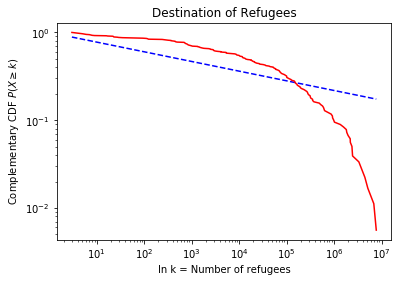

alpha=  1.1102703222822132   sigma=  0.008241990856279191


In [11]:
plt.figure(figsize=(18,8));

#lables = [r'$x^{-( \alpha-1)}, \alpha = 1.11$', "Empirical data"]


fit = powerlaw.Fit(np.array(degree_values)+1,xmin=1,discrete=False)
fit.power_law.plot_ccdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_ccdf( color= 'r')
plt.title('Destination of Refugees')
plt.xlabel('In k = Number of refugees')
plt.ylabel('Complementary CDF '+ r'$P(X\geq k)$')
#plt.legend(lables, loc='best', fontsize = 'small')

plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)